In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


# Training an Artificial Neural Network

In [4]:
nn_data = pd.read_csv('data_Q1.csv')

In [5]:
training_x1 = nn_data.iloc[:, 0].to_numpy()
training_x2 = nn_data.iloc[:, 1].to_numpy()
training_y = nn_data.iloc[:, 2].to_numpy().reshape(-1, 1) # Target reshaped to column vector for matrix operations
# or else it would be an 1D array, with reshape(-1, 1) it becomes a matrix of shape (N, 1)

In [6]:
def sigmoid(x):
    '''
    Sigmoid activation function
    renders 1 / 1 + e^{-x}
    '''
    return 1 / (1 + np.exp(-x))

def grad_sigmoid(x):
    '''
    derivative of sigmoid function
    renders x * (1 - x)
    where x is already sigma-activated
    '''
    return x * (1 - x)
    

### And in the attatched .pdf file (gradient_calculation) $\sigma'(x) = \sigma(x) \times (1 - \sigma(x))$ 

In [7]:
np.random.seed(123)

In [8]:
# Number of training samples
N = len(training_y)

In [9]:
# Constructing a feature matrix of dimension 3 x N
training_x = np.array([[x1, x2, 1] for x1, x2 in zip(training_x1, training_x2)])

## Homogenizing the input layer so that the bias term is appended
### $y = w_1 x_1 + w_2 x_2 + b$
### which can also be written as $y = w^T x$
### where $x = \begin{bmatrix}x_1 \\ x_2 \\ 1 \end{bmatrix}$ and $w = \begin{bmatrix}w_1 \\ w_2 \\ b \end{bmatrix}$
 bias is incorporated directly into the weight matrix instead of considering it as an "extra" node

In [10]:
def initialize_weights():
    '''
    Initializing weight matrices randomly in [-1, 1]
    '''
    weights_1 = 2 * np.random.random((3, 3)) - 1  # Weights for input -> hidden (3x3)
    weights_2 = 2 * np.random.random((4, 1)) - 1  # Weights for hidden -> output (4x1)

    return weights_1, weights_2

In [11]:
# parameters
learning_rate = 0.05 # hyperparameter η
max_epochs = 100 # number of training iterations of the training loop
training_error = []

In [12]:
def train_nn(training_x, training_y, eta=learning_rate):

    weights_1, weights_2 = initialize_weights()
    training_error = []

    # Training loop
    for epoch in range(max_epochs):
        
        # Forward propagation
        X = training_x # Input layer
        H = np.dot(X, weights_1)  # Linear transformation to hidden layer  
        Z = sigmoid(H)  # Activation at hidden layer
        Z = np.hstack((Z, np.ones((Z.shape[0], 1))))  # Add bias term to hidden layer

        # pre-activation of output layer
        O = Z @ weights_2 # Linear transformation to output layer 
        y_hat = sigmoid(O) # Final output layer activation 

        # Compute loss (MSE) Mean squared error loss
        loss = np.mean(0.5 * (training_y - y_hat) ** 2)
        training_error.append(loss)

        # Backpropagation

        #output layer error
        delta_O = -(training_y - y_hat) * grad_sigmoid(y_hat)
        # grad_sigmoid(y_hat) ŷ because ŷ itself is a sigmoid function in O
        # As grad_sigmoid takes in sigmoid activated input, ŷ is parsed instead of grad_sigmoid(O)
        gradient2 = np.dot(Z.T, delta_O) / N # Gradient for output layer weights

        # Hidden layer error
        hidden_error_signal = delta_O @ weights_2.T # propogate error from output to hidden layer
        delta_H = hidden_error_signal[:, :-1] * grad_sigmoid(Z[:, :-1])  # Ignore bias term
        gradient1 = np.dot(X.T, delta_H) / N  # Gradient for hidden layer weights

        # Update weights using gradient descent
        weights_1 -= eta * gradient1
        weights_2 -= eta * gradient2

    return training_error  # Return loss values 

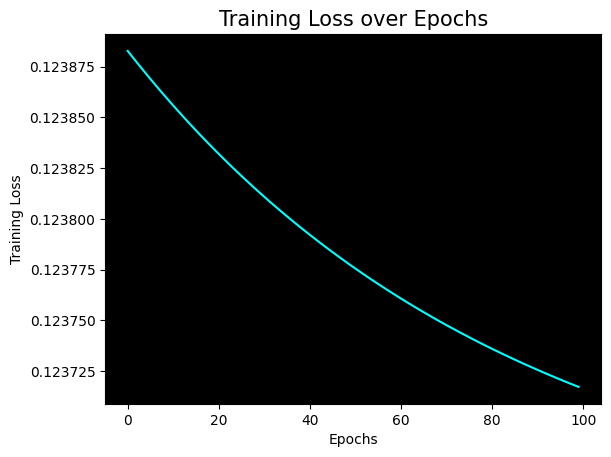

In [13]:
training_error = train_nn(training_x, training_y)

# for each epoch 1 to 100
n_epochs = np.arange(max_epochs)

# Plot training loss
plt.gca().set_facecolor('black')
plt.plot(n_epochs, training_error, color='cyan')
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss over Epochs", fontsize=15)
plt.show()

#
# "Predicting Abalone Age Using K-Nearest Neighbors"

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

In [16]:
abalone = pd.read_csv(url, header=None) # Load the Abalone dataset (age prediction)

In [17]:
# abalone # To Verify

In [18]:
column_names = ["Sex", "Length", "Diameter", "Height", "Whole weight","Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [19]:
abalone.columns = column_names

In [20]:
abalone = abalone.drop(columns=["Sex"])

In [21]:
abalone.head() # To verify

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
y = abalone["Rings"].values # Age of Abalone, kinda like countimg tree rings
# or ring_columns = abalone.loc[:, "Rings"])
X = abalone.drop(columns=["Rings"]).values # Feature matrix

In [23]:
# Split into training and testing sets (featues & target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

In [24]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [25]:
def mean_squared_error(actual_y, predicted_y):
    """
    Computes (MSE)
    """
    return np.mean((actual_y - predicted_y) ** 2)

In [26]:
def compute_mode(arr):
    """
    computes the mode using NumPy
    """
    # np.random.seed(0)
    counts = np.bincount(arr)  # Count occurrences of each value
    max_count = np.max(counts)  # Find the highest frequency
    mode_values = np.where(counts == max_count)[0]  # Find all values with max frequency
    
    # If multiple modes exist, choose randomly
    predicted_age = np.random.choice(mode_values) if len(mode_values) > 1 else mode_values[0]
    # print(predicted_age)

    return predicted_age

In [27]:
def knn_predict(X_train, y_train, test_point, k):
    """
    Predict age using k-Nearest Neighbors
    """
    distances = np.linalg.norm(X_train - test_point, axis=1)  # Compute Euclidean distances
    nearest_neighbors = np.argsort(distances)[:k]  # Select k nearest neighbors 
    neighbor_ages = y_train[nearest_neighbors]  # Get corresponding ages
    return compute_mode(neighbor_ages)  # Predict the most common age

## **New abalone data**
$$
\begin{array}{|c|c|}
    \hline
    \textbf{Variable} & \textbf{Value} \\
    \hline
    \text{Length} & 0.569552 \\
    \text{Diameter} & 0.446407 \\
    \text{Height} & 0.154437 \\
    \text{Whole weight} & 1.016849 \\
    \text{Shucked weight} & 0.439051 \\
    \text{Viscera weight} & 0.222526 \\
    \text{Shell weight} & 0.291208 \\
    \hline
\end{array}
$$


In [28]:
new_abalone = np.array(([0.569552, 0.446407, 0.154437, 1.016849, 0.439051, 0.222526, 0.291208]))
predicted_age = knn_predict(X_train, y_train, new_abalone, k=3)
print(f"Predicted age of the new abalone: {predicted_age}")

Predicted age of the new abalone: 11


# _For the Entire DataSet_

In [29]:
mse_values = []

k_range = range(1, 51)

for k in k_range:
    
    predicted_ages_test = [knn_predict(X_train, y_train, test_point, k) for test_point in X_test]
    MSE = mean_squared_error(y_test, np.array(predicted_ages_test))
    mse_values.append(MSE)

    if k == 3:
        print(f"Mean Squared Error (MSE) on test set: {MSE:.4f}\n")

Mean Squared Error (MSE) on test set: 7.8533



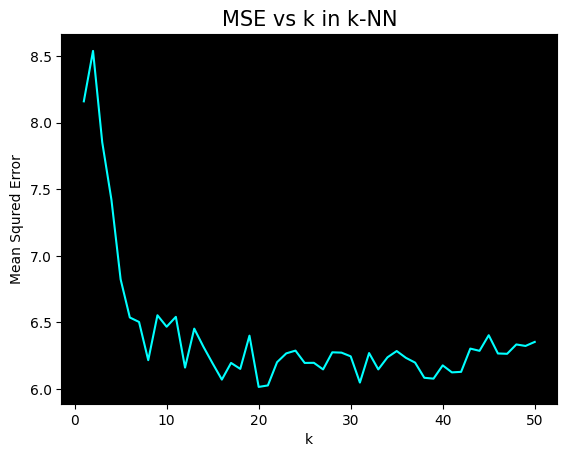

In [30]:
# Plot MSE vs k
plt.gca().set_facecolor('black')
plt.plot(k_range, mse_values, color='cyan')
plt.xlabel('k')
plt.ylabel('Mean Squred Error')
plt.title('MSE vs k in k-NN', fontsize=15)
plt.show()

In [31]:
# Find optimal k
best_k = np.argmin(mse_values) + 1  # Adding 1 since index starts at 0
best_mse = mse_values[best_k - 1]
print(f"Optimal k: {best_k}, Optimal MSE: {best_mse:.4f}")

Optimal k: 20, Optimal MSE: 6.0152


In [32]:
# # If multiple k values have the same optimal MSE, pick one randomly
# optimal_k_values = [i+1 for i, mse in enumerate(mse_values) if mse == best_mse]
# if len(optimal_k_values) > 1:
#     chosen_k = np.random.choice(optimal_k_values)
#     print(f"Randomly chosen optimal k: {chosen_k}")

## optimal_k is (random) because of the randomness in selection